In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib
# matplotlib.use('Qt5Agg')

from scipy.integrate import solve_ivp


In [2]:
EIL2 = 1
# differential equations for integration
def sys_equ(s, var, nx, ny): 
    th, dth, x, y = var
    eq0 = dth
    eq1 = nx/EIL2*np.sin(th) - ny/EIL2*np.cos(th)
    eq2 = np.cos(th)
    eq3 = np.sin(th)
    return [eq0, eq1, eq2, eq3]

# Interactive plots

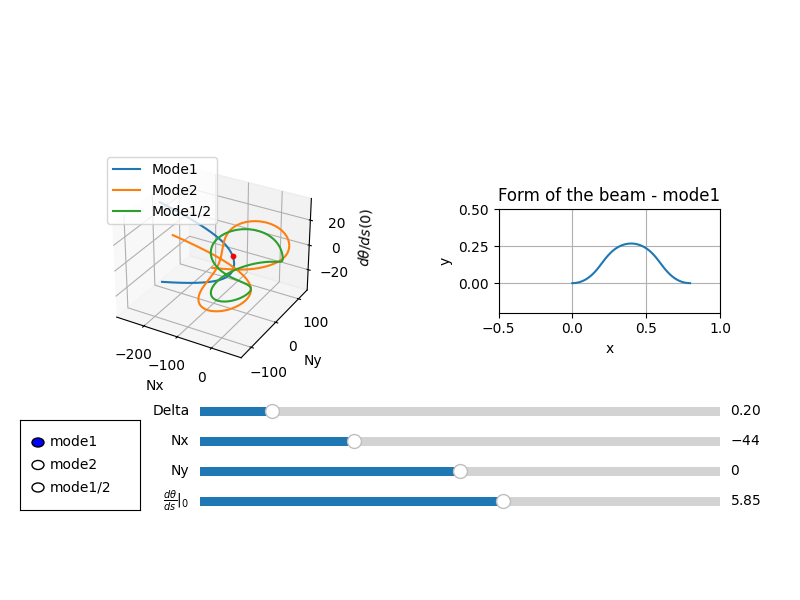

In [5]:
%matplotlib widget
# matplotlib.use('Qt5Agg')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(121, projection='3d')
fig.subplots_adjust(bottom=0.25) # left=0.25, 

bvp_mode1 = pd.read_csv("Data/solve_bvp_data_mode1.csv")
bvp_mode2 = pd.read_csv("Data/solve_bvp_data_mode2.csv")
mode12_bvp = pd.read_csv("Data/Data_mode12_bvp.csv")

z1 = np.concatenate((np.flip(bvp_mode1.dtheta0.values), -bvp_mode1.dtheta0.values), axis=None)
x1 = np.concatenate((np.flip(bvp_mode1.Nx.values), bvp_mode1.Nx.values), axis=None)
y1 = np.concatenate((np.flip(bvp_mode1.Ny.values), -bvp_mode1.Ny.values), axis=None)

z2 = np.concatenate((np.flip(bvp_mode2.dtheta0.values), -bvp_mode2.dtheta0.values), axis=None)
x2 = np.concatenate((np.flip(bvp_mode2.Nx.values), bvp_mode2.Nx.values), axis=None)
y2 = np.concatenate((np.flip(bvp_mode2.Ny.values), -bvp_mode2.Ny.values), axis=None)

z12 = np.concatenate((mode12_bvp.dtheta0.values,np.flip(- mode12_bvp.dtheta0.values)), axis=None)
x12 = np.concatenate((mode12_bvp.Nx.values,np.flip(mode12_bvp.Nx.values)), axis=None)
y12 = np.concatenate((mode12_bvp.Ny.values,np.flip(mode12_bvp.Ny.values)), axis=None)
z12 = np.concatenate((z12,np.flip(z12)), axis=None)
x12 = np.concatenate((x12, np.flip(x12)), axis=None)
y12 = np.concatenate((y12,np.flip(-y12)), axis=None)

ax.plot(x1, y1, z1, label='Mode1')
ax.plot(x2, y2, z2, label='Mode2')
ax.plot(x12, y12, z12, label='Mode1/2')
# ax.set_title('')
ax.set_xlabel("Nx")
ax.set_ylabel("Ny")
ax.set_zlabel(r"$d\theta/ds(0)$")
ax.legend()


ax2 = fig.add_subplot(122)

# Mesh points for s
s = np.linspace(0, 1, 100)
# Select initial value, calculate beam form
point_mode = bvp_mode1.iloc[(bvp_mode1['delta']-0.2).abs().argsort()[0]]
solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)

line, = ax2.plot(solution_ivp.sol(s)[2], solution_ivp.sol(s)[3])
sc = ax.scatter([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']], color = 'red',s=10, label='_nolegend_')


ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Form of the beam - mode1")
ax2.grid(True)
ax2.set_aspect('equal') 
ax2.set_xlim([-0.5, 1])
ax2.set_ylim([-0.2, 0.5])

# Silder to select displacement (for mode 1 and 2)
axDelta = fig.add_axes([0.25, 0.3, 0.65, 0.03])
Delta_slider = Slider(
    ax=axDelta,
    label='Delta',
    valmin=0.0001,
    valmax=1.45,
    valinit=0.2,
    initcolor = 'none',
)
# Silder to select Nx (for mode 1/2)
axNx = fig.add_axes([0.25, 0.25, 0.65, 0.03])
Nx_slider = Slider(
    ax=axNx,
    label='Nx',
    valmin=-86,
    valmax=56,
    valinit=-44,
    initcolor = 'none',
)
Nx_slider.set_active(False)
# Silder to show Ny 
axNy = fig.add_axes([0.25, 0.2, 0.65, 0.03])
Ny_slider = Slider(
    ax=axNy,
    label='Ny',
    valmin=ax.get_ylim()[0],
    valmax=ax.get_ylim()[1],
    valinit=0,
    initcolor = 'none',
)
Ny_slider.set_active(False)
# Silder to show dtheta/ds 
axtheta = fig.add_axes([0.25, 0.15, 0.65, 0.03])
Theta_slider = Slider(
    ax=axtheta,
    label=r'$\left.\frac{d\theta}{ds}\right|_0$',
    valmin=ax.get_zlim()[0],
    valmax=ax.get_zlim()[1],
    valinit=5.85,
    initcolor = 'none',
)
Theta_slider.set_active(False)



# Ratio button to select mode
radios_ax = fig.add_axes([0.025, 0.15, 0.15, 0.15])
mode_radios = RadioButtons(radios_ax, ('mode1', 'mode2', 'mode1/2'), active=0)

def mode_radios_on_clicked(label):
    if label == 'mode1/2':
        Delta_slider.set_active(False)
        Nx_slider.set_active(True)
        
        point_mode = mode12_bvp.iloc[(mode12_bvp['Nx']+44).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        # param0, sol_ivp = beam_deform_ivp(1, point_mode['delta'], point_mode['dtheta0'], np.array([point_mode['Nx'],point_mode['Ny']]))
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        ax2.set_title("Form of the beam - mode1/2")

        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        Theta_slider.set_val(point_mode['dtheta0'])
        Nx_slider.set_val(point_mode['Nx'])
        Ny_slider.set_val(point_mode['Ny'])
        
        Delta_slider.set_val(1)
        
    elif label == 'mode1':
        Delta_slider.set_active(True)
        Nx_slider.set_active(False)
        
        # Select initial value, calculate beam form
        point_mode = bvp_mode1.iloc[(bvp_mode1['delta']-Delta_slider.val).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        ax2.set_title("Form of the beam - mode1")
        
        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        Theta_slider.set_val(point_mode['dtheta0'])
        Nx_slider.set_val(point_mode['Nx'])
        Ny_slider.set_val(point_mode['Ny'])
        
    else :
        Delta_slider.set_active(True)
        Nx_slider.set_active(False)
        
        # Select initial value, calculate beam form
        point_mode = bvp_mode2.iloc[(bvp_mode2['delta']-Delta_slider.val).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        ax2.set_title("Form of the beam - mode2")
        
        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        Theta_slider.set_val(point_mode['dtheta0'])
        Nx_slider.set_val(point_mode['Nx'])
        Ny_slider.set_val(point_mode['Ny'])
        
    fig.canvas.draw_idle()
mode_radios.on_clicked(mode_radios_on_clicked)


# The function to be called anytime a slider's value changes
def update_silder(val):
    
    if mode_radios.value_selected == 'mode1':
        # Select initial value, calculate beam form
        point_mode = bvp_mode1.iloc[(bvp_mode1['delta']-Delta_slider.val).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        
        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        
        Theta_slider.set_val(point_mode['dtheta0'])
        Nx_slider.set_val(point_mode['Nx'])
        Ny_slider.set_val(point_mode['Ny'])
        
    elif mode_radios.value_selected == 'mode2':
        # Select initial value, calculate beam form
        point_mode = bvp_mode2.iloc[(bvp_mode2['delta']-Delta_slider.val).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        
        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        
        Theta_slider.set_val(point_mode['dtheta0'])
        Nx_slider.set_val(point_mode['Nx'])
        Ny_slider.set_val(point_mode['Ny'])
        
    fig.canvas.draw_idle()

Delta_slider.on_changed(update_silder)

# The function to be called anytime a slider's value changes
def update_silder_Nx(val):
    if mode_radios.value_selected == 'mode1/2':
        point_mode = mode12_bvp.iloc[(mode12_bvp['Nx']-val).abs().argsort()[0]]
        solution_ivp = solve_ivp(sys_equ, [0, 1], [0,point_mode['dtheta0'],0, 0], args=(point_mode['Nx'], point_mode['Ny']),dense_output=True)
        line.set_xdata(solution_ivp.sol(s)[2])
        line.set_ydata(solution_ivp.sol(s)[3])
        sc._offsets3d = ([point_mode['Nx']], [point_mode['Ny']], [point_mode['dtheta0']])
        Theta_slider.set_val(point_mode['dtheta0'])
        Ny_slider.set_val(point_mode['Ny'])
        fig.canvas.draw_idle()
Nx_slider.on_changed(update_silder_Nx)

plt.subplots_adjust(wspace=0.8)
plt.show()
